In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Country-data.csv')

In [6]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [10]:
data.duplicated().sum()

0

In [12]:
data.isnull().sum().sum()

0

In [14]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [16]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [20]:
Category_Colum = data.select_dtypes(include ='object')
Category_Colum.columns

Index(['country'], dtype='object')

In [22]:
data.describe(include = 'object').T

,count,unique,top,freq
country,167,167,Afghanistan,1


# .describe() gives five-number summary statistics for all the numerical features. In the table above particularly averages, maximum and minimum values are mentioned. 

In [26]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [ ]:
## Child mortality average ratio is around 38 %. health to GDP investment is nearly 7 % and so on.

## Visualization

In [35]:
num_col = [column for column in data.columns if data[column].dtype in ['int64', 'float64']]

In [37]:
print(num_col)

['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


In [ ]:
# Pre-Settings for Numerical Columns Visulization using Histogram

In [39]:
sns.set_style("whitegrid")

In [61]:
import math

In [65]:
num_plots = len(num_col)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)
num_rows

5

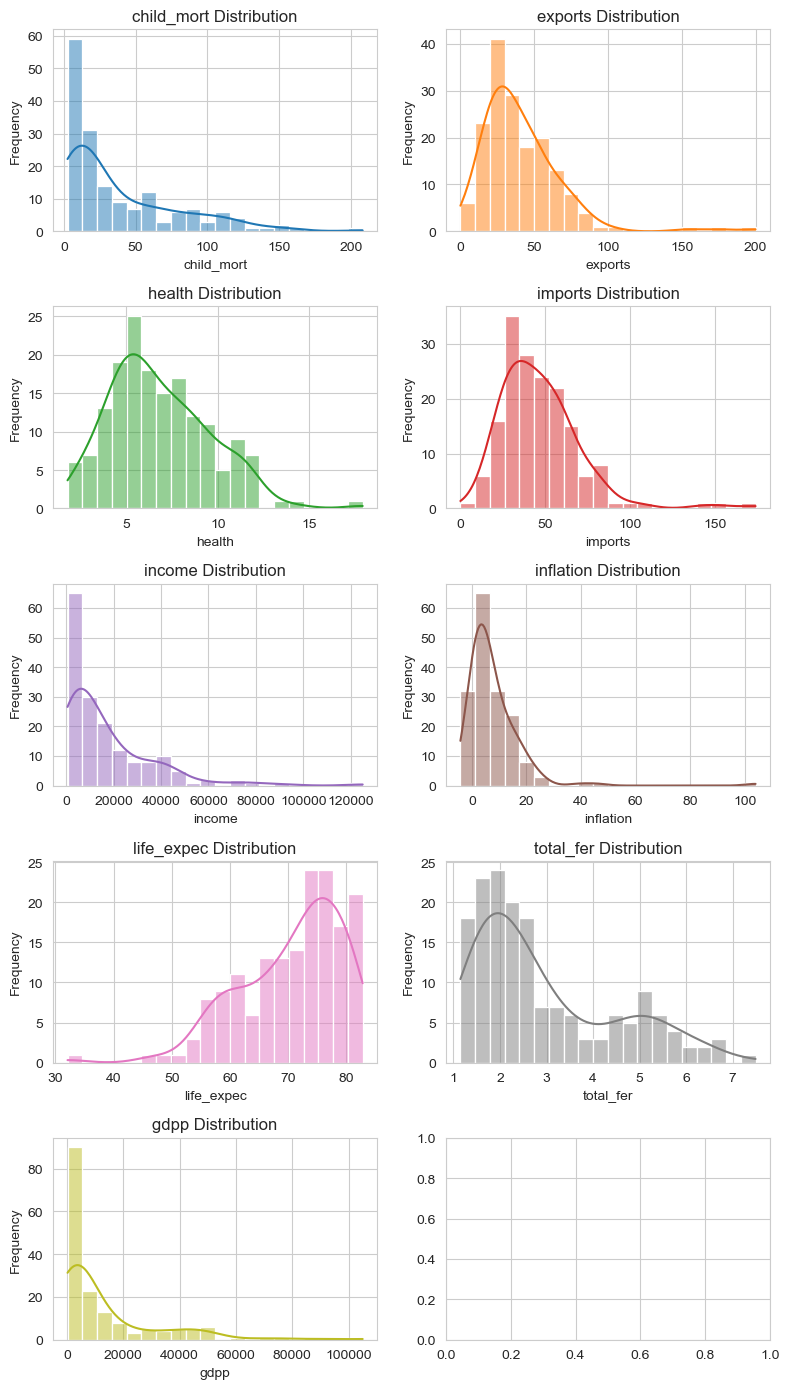

In [81]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 14))
axes = axes.flatten()


for idx, column in enumerate(num_col):
    sns.histplot(data[column], bins=20, kde=True, ax=axes[idx], color=sns.color_palette()[idx % 10])
    axes[idx].set_title(f'{column} Distribution')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### The above-mentioned visuals explain the distribution of key features. 
### Child-Mortality: Almost all countries showing less ratio as well as variations in child mortality. But few have high peaks. This type of variation   is usually driven by epidemics and pandemics. 

### It is observed that almost all the features show skewness, either to the left or right, and hardly any normalized columns could be found. Conceptually speaking, such types of data could hardly be normalized. These are socio-economic or socio-political indicators. Theoretically, we find either high similarity or variation, and vice versa   

### Most countries' life expectancy ratios lie between 60 and 80. Ideally, it is a good indicator of health

# Correlation Analysis

In [93]:
choosen_elements  = data.select_dtypes(include=['int64', 'float64'])

In [95]:
corr_matrix = choosen_elements.corr()

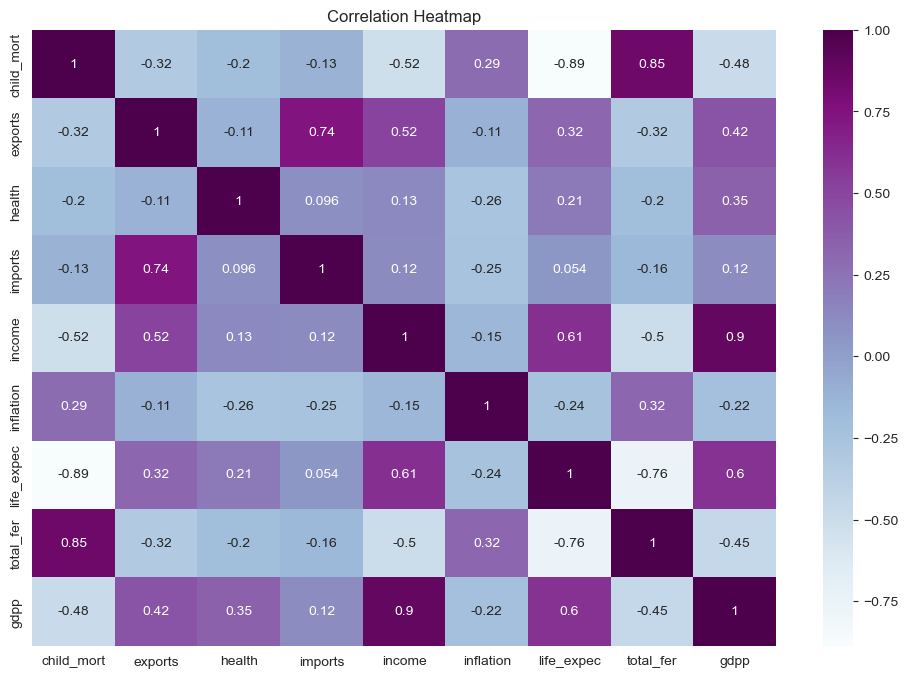

In [101]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Heatmap')
plt.show()

### Child-mortality rate and life expectancy and highly negatively correlated with value -0.89.
### Income and life-expactancy are positive moderatly correlated with value 0.61.


# Outlier Detection

In [114]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

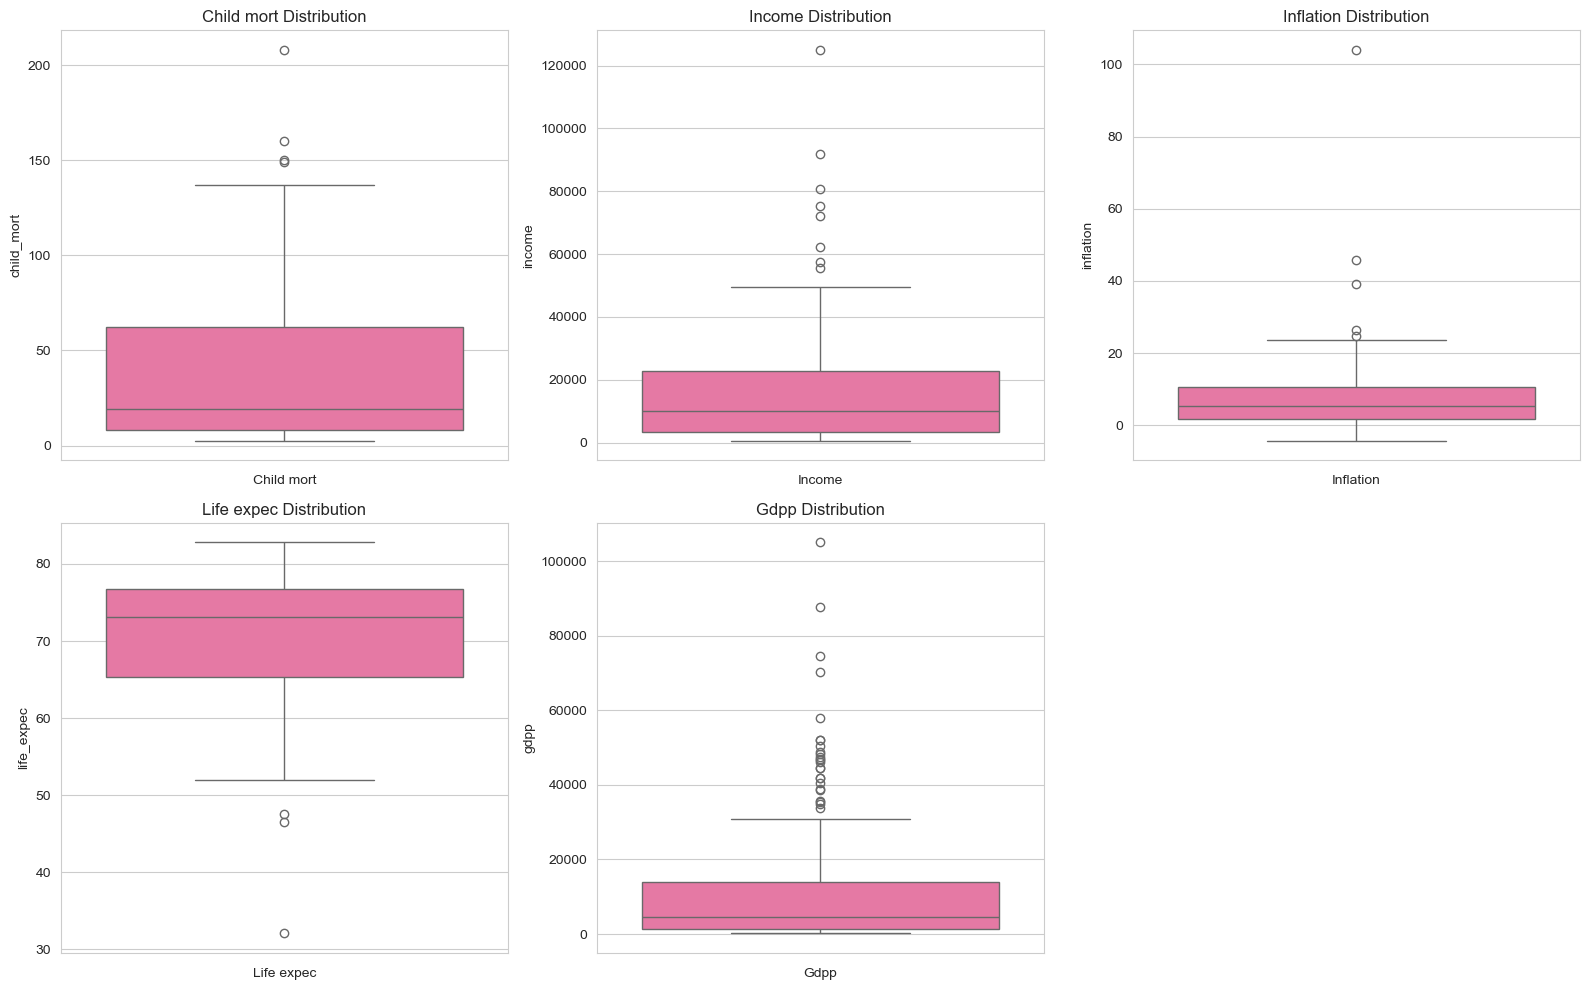

In [118]:
plt.figure(figsize=(16, 10))
variables = ['child_mort', 'income', 'inflation', 'life_expec', 'gdpp']
for i, variable in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[variable], palette='RdPu', legend=False)
    plt.title(f'{variable.replace("_", " ").capitalize()} Distribution')
    plt.xlabel(variable.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()


### Outliers detection is key pre-processing element for makeing data ready for model training and implementation. 
### Child Mortality: Certain countries experience alarmingly high child mortality rates.
### Income: A handful of countries have remarkably high income levels.
### Inflation: Some nations face extraordinarily high inflation rates.
### Life Expectancy: A few countries exhibit alarmingly low life expectancy figures.
### GDP per Capita: Several countries report an unusually high GDP per capita.

# Principal Component Analysis (PCA)

### PCA is a projection technique used to reduce the complexity of a dataset. It works by reducing high dimensionality into lower dimensions without losing too much information. It helps in data simplification and visualization in 2D or 3D.

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [128]:
num_fea = data.drop('country', axis = 1)

In [130]:
num_fea.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [136]:
scale = StandardScaler()

In [138]:
scale_ftr = scale.fit_transform(num_fea)

In [140]:
pca = PCA()
principal_components = pca.fit_transform(scale_ftr)

In [142]:
evr = pca.explained_variance_ratio_

In [ ]:
# explained_variance_ratio  = evr

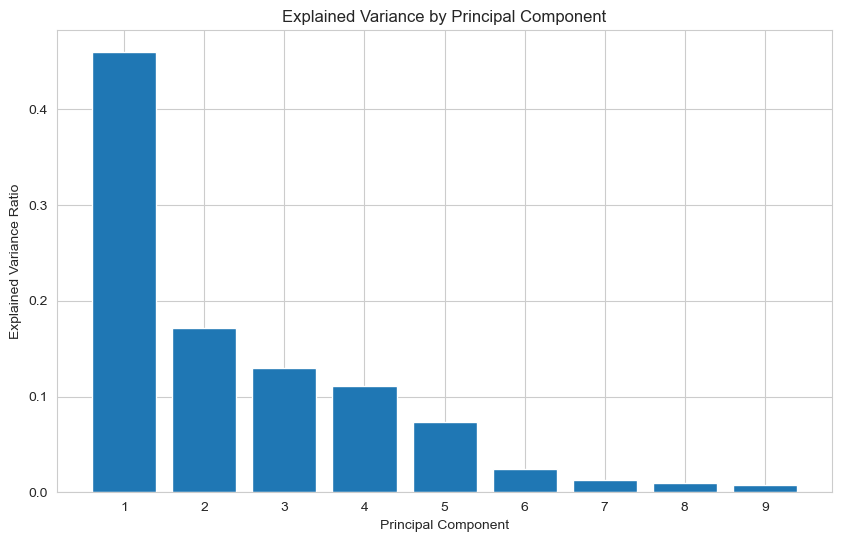

In [146]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(evr) + 1), evr)
plt.title('Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(evr) + 1))
plt.show()

In [ ]:
# cumulative_explained_variance = cve

In [150]:
cev = evr.cumsum()
cev

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

In [ ]:
# Cumulative Explained Variance 
# 2 components: 63.13%# 
3 components: 76.14%# 
4 components: 87.19# %
5 components: 94.5# 3%
6 components: 97.# 02%
7 components: 98# .28%
8 components: 9# 9.26%
9 components:00%0.00%

### Based on PCA projections, selected first five components which altogether explain the 94.5% variance 

# K-Means clustering

In [161]:
from sklearn.cluster import KMeans 

In [163]:
choosen_elements = principal_components[:, :5]

In [165]:
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(choosen_elements)
    inertia_values.append(kmeans.inertia_)

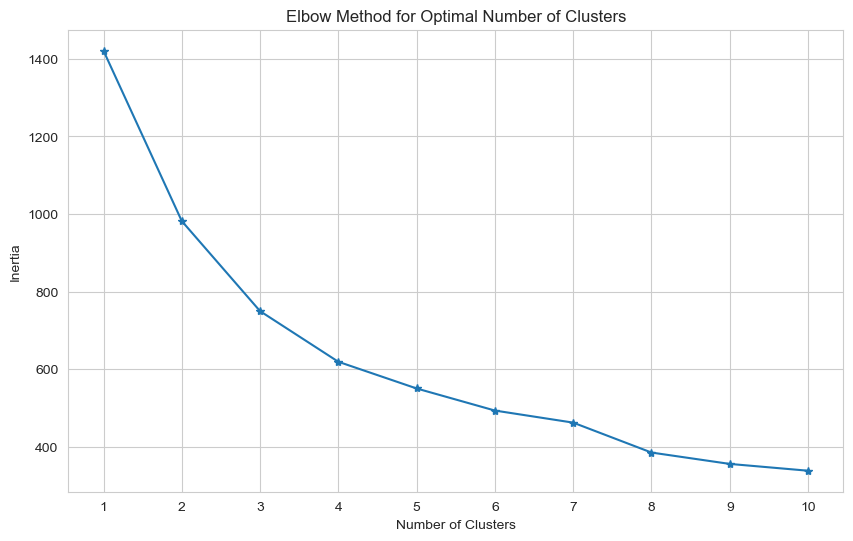

In [171]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='*')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

### Elbow method helps to identify the best K-value. After applying Elbow technique best K-value is selected K = 3.

In [182]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(choosen_elements)

In [184]:
data['Cluster'] = clusters


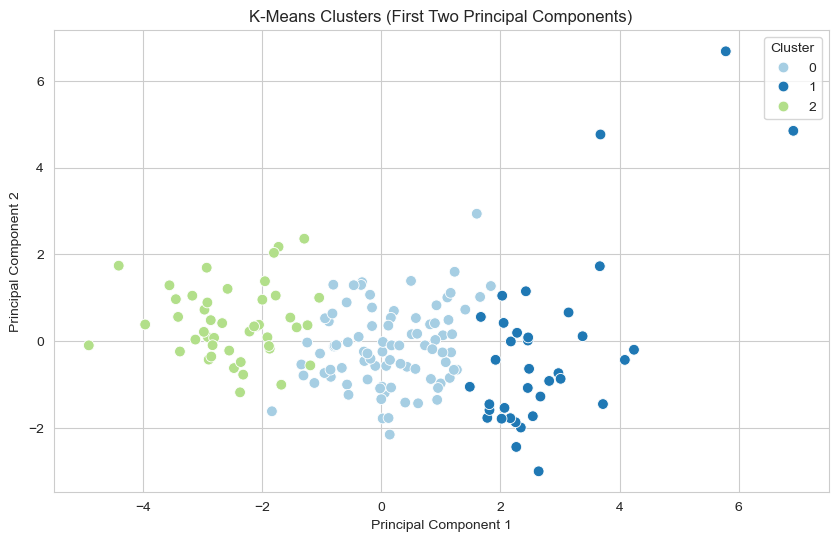

In [210]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='Paired', s=60)
plt.title('K-Means Clusters (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [214]:
numeric_data = data.select_dtypes(include=['number'])
cluster_summary = numeric_data.groupby('Cluster').mean()
cluster_summary

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,22.456977,40.273128,6.251047,47.362394,12321.744186,7.720884,72.566279,2.340349,6461.767442
1,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
2,95.106667,28.602444,6.301111,42.306667,3539.844444,11.986778,59.055556,5.065333,1766.711111


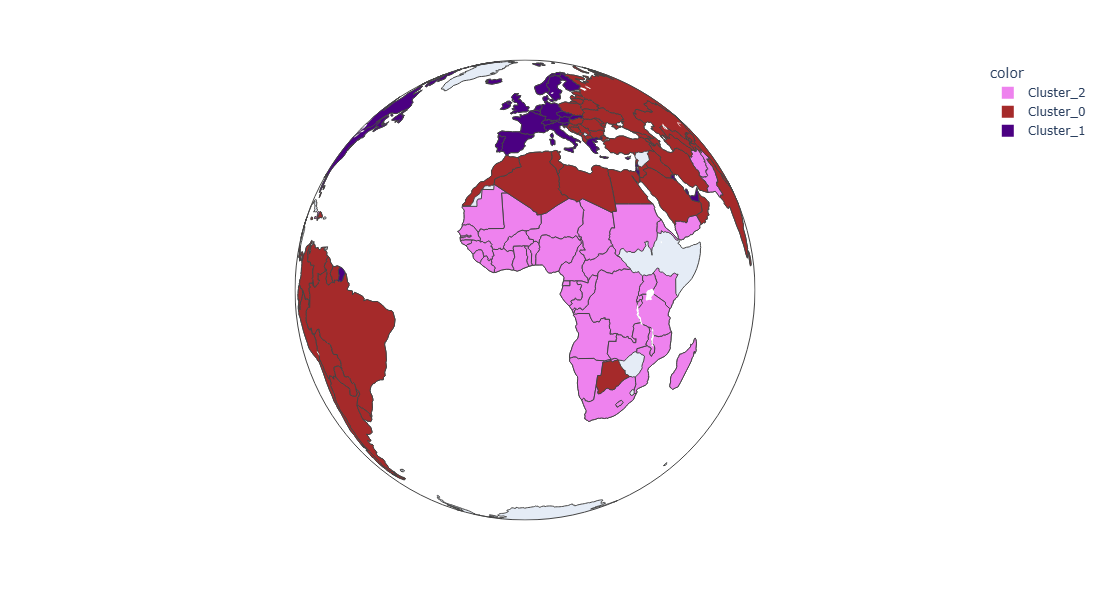

In [218]:
import plotly.express as px

cluster_map = { 0: 'Cluster_0', 1: 'Cluster_1', 2: 'Cluster_2'}
data['cluster_label'] = data['Cluster'].map(cluster_map)

fig = px.choropleth(data[['country', 'cluster_label']], 
                    locations=data['country'], 
                    locationmode='country names', 
                    color=data['cluster_label'],
                    color_discrete_map={'Cluster_0':'brown', 'Cluster_1':'indigo', 'Cluster_2':'violet'},
                    projection='orthographic')

fig.update_layout(
    width=800, 
    height=600  
)

fig.show()


In [222]:
countries_in_clusters = data.groupby('Cluster')['country'].apply(list)
countries_in_clusters

Cluster
0    [Albania, Algeria, Antigua and Barbuda, Argent...
1    [Australia, Austria, Bahrain, Belgium, Brunei,...
2    [Afghanistan, Angola, Benin, Burkina Faso, Bur...
Name: country, dtype: object

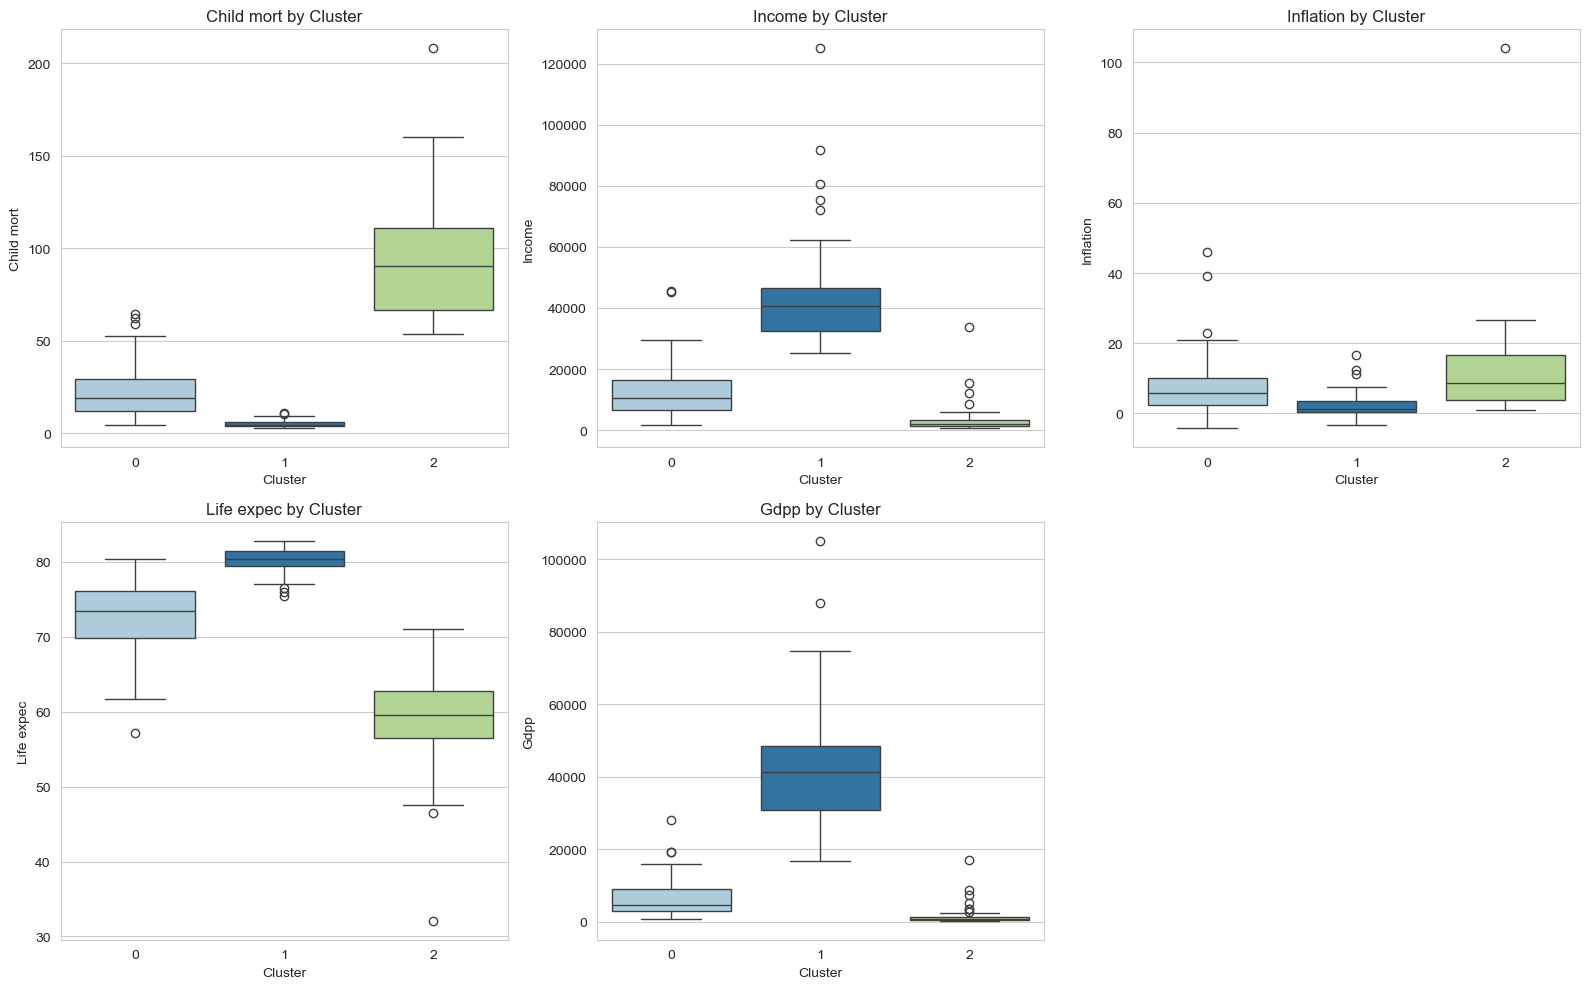

In [226]:
var= ['child_mort', 'income', 'inflation', 'life_expec', 'gdpp']

plt.figure(figsize=(16, 10))

for i, variable in enumerate(var):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Cluster', y=variable, data=data, palette='Paired')
    plt.title(f'{variable.replace("_", " ").capitalize()} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(variable.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()


## Enlisting the Countries based on their assigned Clusters

# Cluster 0:

### Cluster 0 (Intermediate Countries): Includes nations like Albania, Algeria, Argentina, Armenia, Azerbaijan, Bangladesh, Belarus, Bolivia, Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Czech Republic, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Georgia, Greece, Guatemala, Hungary, India, Indonesia, Iran, Jamaica, Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lithuania, Macedonia, Malaysia, Maldives, Malta, Mauritius, Mexico, Moldova, Mongolia, Montenegro, Morocco, Myanmar, Nepal, Oman, Panama, Paraguay, Peru, Philippines, Poland, Portugal, Romania, Russia, Samoa, Saudi Arabia, Serbia, Seychelles, Singapore, Slovak Republic, Slovenia, South Africa, South Korea, Sri Lanka, St. Vincent and the Grenadines, Suriname, Tajikistan, Thailand, Tonga, Tunisia, Turkey, Turkmenistan, Ukraine, United Arab Emirates, Uruguay, Uzbekistan, Vanuatu, Venezuela, Vietnam.

# Cluster 1 (Developed Countries): 

### Australia, Austria, Bahrain, Belgium, Brunei, Canada, Cyprus, Denmark, Finland, France, Germany, Iceland, Ireland, Israel, Italy, Japan, Kuwait, Luxembourg, Netherlands, New Zealand, Norway, Qatar, Spain, Sweden, Switzerland, United Kingdom, United States.

# Cluster 2 (Developing Countries): 

### Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, Solomon Islands, South Sudan, Sudan, Swaziland, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia, Zimbabwe. These lists provide specific insights into the categorization of countries and can be used by policymakers, economists, and organizations to tailor strategies, investments, and initiatives according to the developmental stage and challenges faced by each group of countries.

# Statistical Observation based on Cluster Distribution 

## Cluster 0:
##### Child Mortality: Moderate (21.93)
##### Income: Moderate (12,305.60)
##### Inflation: Moderate (7.60)
##### Life Expectancy: Moderate (72.81)
##### GDP per Capita: Moderate (6,486.45)


## Cluster 1 (Developed Countries):¶
##### Child Mortality: Low (5.00)
##### Income: High (45,672.22)
##### Inflation: Low (2.67)
##### Life Expectancy: High (80.13)
##### GDP per Capita: High (42,494.44).44)

## Cluster 2 (Developing Countries):
##### Child Mortality: High (92.96)
##### Income: Low (3,942.40)
##### Inflation: High (12.02)
##### Life Expectancy: Low (59.19)
##### GDP per Capita: Low (1,922.38)

# ---------------------------------- The End ----------------------------------------------